## Strongly Connected Components (SCCs) and Maximal End Components (MECs)
This notebook shows examples on how to obtain the Strongly Connected Components (SCCs) (using Tarjan's Algorithm) and Maximal End Components (MECs) from a DTMC or MDP. Retrieval of MECs follows algorithm as given in [dissertation of Luca de Alfaro](http://i.stanford.edu/pub/cstr/reports/cs/tr/98/1601/CS-TR-98-1601.pdf), page 48. States colored green are not part of any end component.

The DTMCs/MDPs are slight modifications of the example given in the [wikipedia article regarding Tarjan's Algorithm](https://en.wikipedia.org/wiki/Tarjan%27s_strongly_connected_components_algorithm#/media/File:Tarjan's_Algorithm_Animation.gif).


components: [0. 0. 0. 2. 1. 2. 1. 3.] components count: 4


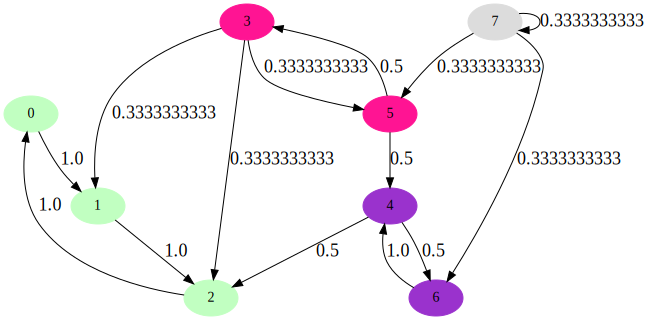

In [7]:
from switss.model import DTMC
import numpy as np
from switss.utils import color_from_hash

# example on how to retrieve SCCs from a DTMC
# setup the graph
# ----------------
E = [[0,1],[1,2],[2,0],[3,2],[3,1],[3,5],[4,2],[4,6],[5,4],[5,3],[6,4],[7,5],[7,6],[7,7]]
P = np.zeros(shape=(8,8))
for u,v in E:
    # initialize with arbitrary probabilities
    ucount = len([w for w,z in E if w == u])
    P[u,v] = 1/ucount
# ----------------

# retrieve SCCs
dtmc = DTMC(P)
components,scs_count = dtmc.strongly_connected_components()
print("components:",components,"components count:",scs_count)

def sm(stateidx,labels):
    # give every component a new color. factor of 7 is used to make SCCs better distinguishable
    return { "color" : color_from_hash(7*components[stateidx]), "style" : "filled" } 

dtmc.digraph(state_map=sm)

components: [1. 1. 1. 0. 0. 0. 0. 0.] MEC components count: 1


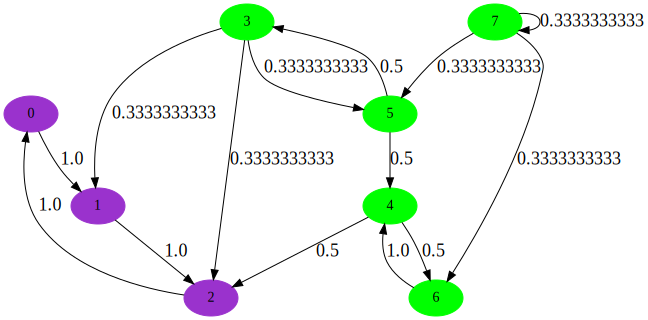

In [8]:
# using the example-DTMC above, we can retrieve its MECs.
# 0-entries identify states that are not part of any MEC.
components,mec_count = dtmc.maximal_end_components()
print("components:",components,"MEC components count:", mec_count)

def sm(stateidx,labels):
    # give every state a green color that is not part of any MEC
    color = "green" if components[stateidx] == 0 else color_from_hash(7*components[stateidx])
    return { "color" : color, "style" : "filled" } 

dtmc.digraph(state_map=sm)

components: [0. 0. 0. 2. 1. 2. 1. 3.] components count: 4


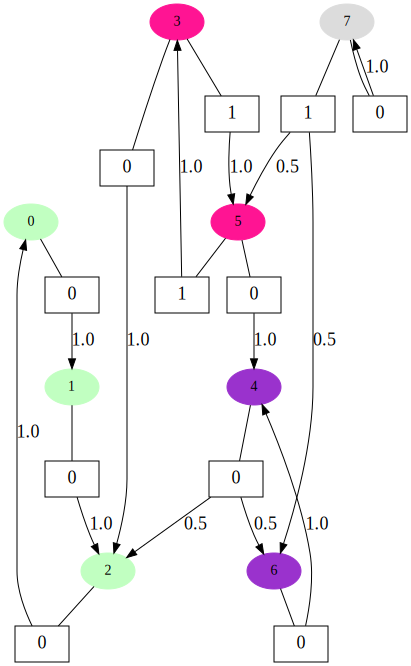

In [9]:
from switss.model import MDP
import numpy as np
from switss.utils import color_from_hash

# example on how to retrieve SCCs from a MDP
# setup the graph
# ----------------
SAPpairs = [(0,0,1,1),(1,0,2,1),(2,0,0,1),(3,0,2,1),(4,0,2,0.5),(3,1,5,1),(5,1,3,1),(5,0,4,1),(4,0,6,0.5),(6,0,4,1),(7,1,6,0.5),(7,1,5,0.5),(7,0,7,1)]
index_by_state_action = {(0,0):0,(1,0):1,(2,0):2,(3,0):3,(4,0):4,(3,1):5,(5,1):6,(5,0):7,(6,0):8,(7,1):9,(7,0):10}
P = np.zeros(shape=(11,8))
for s,a,d,p in SAPpairs:
    P[index_by_state_action[(s,a)],d] = p
# ----------------

# retrieve SCCs
mdp = MDP(P,index_by_state_action)
components,scs_count = mdp.strongly_connected_components()
print("components:",components,"components count:",scs_count)

def sm(stateidx,labels):
    # give every component a new color. factor of 7 is used to make SCCs better distinguishable
    return { "color" : color_from_hash(7*components[stateidx]), "style" : "filled" } 

mdp.digraph(state_map=sm)

components: [3. 3. 3. 2. 0. 2. 0. 1.] MEC components count: 3


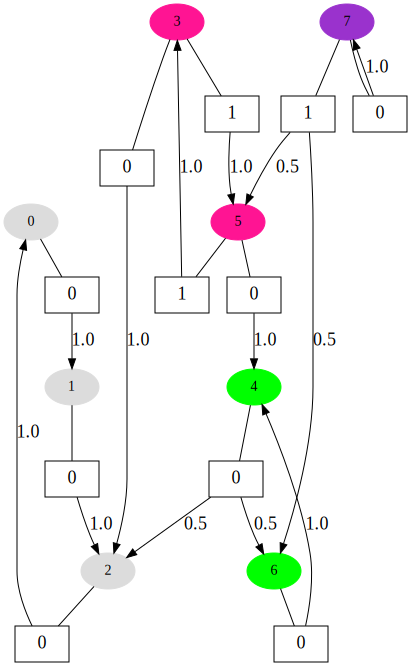

In [10]:
# using the example-MDP above, we can retrieve its MECs.
# 0-entries identify states that are not part of any MEC.
components,mec_count = mdp.maximal_end_components()
print("components:",components,"MEC components count:", mec_count)

def sm(stateidx,labels):
    # give every state a green color that is not part of any MEC
    color = "green" if components[stateidx] == 0 else color_from_hash(7*components[stateidx])
    return { "color" : color, "style" : "filled" } 

mdp.digraph(state_map=sm)